In [1]:
import xlrd


In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('housedata.csv')

In [7]:
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [8]:
df.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [9]:
df=df.fillna(df.mean())

In [10]:
def hprice(p):
    if p<50000:
        return 'low' # 1= low
    elif p<100000:
        return 'medium'# 2= medium
    else:
        return 'high' # 3 = high
    

In [11]:
df['category']=df.Price.map(hprice)

In [12]:
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,category
0,1,1177.698,2,7,2,2,2,62000,medium
1,2,2134.800,5,7,4,2,2,78000,medium
2,3,1138.560,5,7,2,2,1,58000,medium
3,4,1458.780,2,7,3,2,2,45000,low
4,5,967.776,11,14,3,2,2,45000,low
...,...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000,low
641,645,377.148,4,10,1,1,1,24800,low
642,646,740.064,13,14,1,1,1,45000,low
643,647,1707.840,3,14,3,2,2,65000,medium


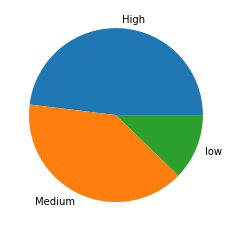

In [13]:
labels = 'High', 'Medium', 'low'
plt.pie(df['category'].value_counts(),labels=labels)
plt.show()

In [14]:
x = df[['Sqft']]

In [15]:
y = df['Price']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [18]:
clf.fit(x_train,y_train)

LinearRegression()

In [19]:
print(x_train)

         Sqft
537  1426.758
349   818.340
379  2184.612
500  1102.980
90   1992.480
..        ...
129   732.948
144  1245.300
72   1892.856
235   587.070
37    768.528

[516 rows x 1 columns]


In [20]:
print(y_train)

537    48120
349    42000
379    63000
500    50000
90     70000
       ...  
129    27000
144    39000
72     90000
235    36000
37     60000
Name: Price, Length: 516, dtype: int64


In [21]:
clf.predict(x_train)

array([ 57973.6298031 ,  34612.10489118,  87073.07311445,  45541.47327103,
        79695.74945805,  63848.16530727,  35978.27593866,  30786.82595823,
        60569.35479332,  76690.17315359,  68356.52976396,  21223.62862586,
        91444.82046639,  28874.18649176,  61389.0574218 , 125052.62823442,
        48000.58115649,  70542.40343993,  63028.46267878,  60296.12058382,
        27781.24965377,  59203.18374584, 110024.74671213,  57837.01269835,
        37071.21277664,  42809.13117606,  61389.0574218 ,  55377.90481289,
        59886.26926958,  30513.59174873,  72864.89422065,  44175.30222354,
        30513.59174873, 120817.49798723,  53738.49955591,  46497.79300426,
        97455.9730753 ,  22316.56546385, 146638.13078462,  68766.3810782 ,
        56470.84165087,  76280.32183935,  84613.96522898,  29420.65491075,
        23682.73651133, 100871.40069401,  37344.44698614,  63438.31399303,
       102647.42305573,  31606.52858672, 194454.11744645,  60842.58900281,
        25868.6101873 ,  

In [22]:
clf.score(x_train,y_train)

0.6926960236430326

In [23]:
a=clf.predict(x_test)

In [24]:
a[1]

82018.24023876796

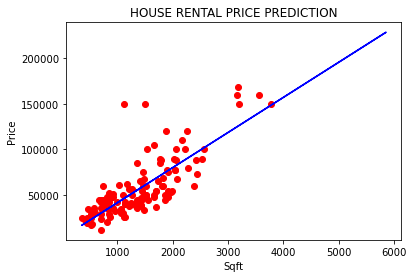

In [25]:
plt.scatter(x_test.iloc[:,0],y_test,color='red')
plt.plot(x_train.iloc[:,0],clf.predict(x_train),color='blue')
plt.title('HOUSE RENTAL PRICE PREDICTION')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.show()

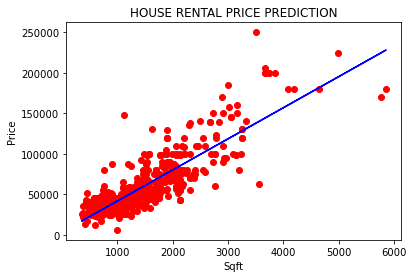

In [26]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,clf.predict(x_train),color='blue')
plt.title('HOUSE RENTAL PRICE PREDICTION')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.show()

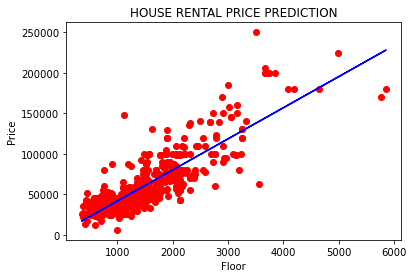

In [27]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,clf.predict(x_train),color='blue')
plt.title('HOUSE RENTAL PRICE PREDICTION')
plt.xlabel('Floor')
plt.ylabel('Price')
plt.show()

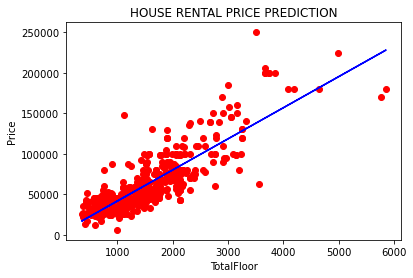

In [28]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,clf.predict(x_train),color='blue')
plt.title('HOUSE RENTAL PRICE PREDICTION')
plt.xlabel('TotalFloor')
plt.ylabel('Price')
plt.show()

In [29]:
X_test = df.drop('Price', axis=1)
Y_test = df['Price']

In [30]:
df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': a})
df

,Actual Price,Predicted Price
361,65000,69995.935021
442,78000,82018.240239
459,57000,49503.369309
386,100000,88712.478371
624,120000,75597.236316
...,...,...
245,50000,45678.090376
62,45000,57837.012698
201,65999,57290.544279
274,26000,46907.644319


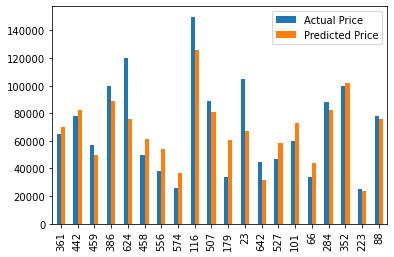

In [31]:
df1 = df.head(20)
df1.plot(kind='bar')
plt.show()